In [1]:
# Cell 1: Import required libraries and setup paths (previous code remains the same)
import os
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import random

# Add project root to Python path
project_root = str(Path(os.getcwd()).parent)
sys.path.append(project_root)

from src.preprocessor import HSIPreprocessor

In [2]:
# Cell 2: Set up paths (same as before)
DATASET_ROOT = Path(project_root) / "data/ho/raw/2018IEEEGRSS_DataFusionChallenge/ImageryAndTrainingGT/2018IEEE_Contest/Phase2"
HSI_PATH = str(DATASET_ROOT / "FullHSIDataset/20170218_UH_CASI_S4_NAD83.pix")
GT_PATH = str(DATASET_ROOT / "TrainingGT/2018_IEEE_GRSS_DFC_GT_TR.tif")

In [3]:
# Cell 3: Create preprocessor
preprocessor = HSIPreprocessor(
    data_path=HSI_PATH,
    gt_path=GT_PATH,
    dataset_name='HO',
    n_components=30,
    window_size=25
)

In [4]:
# Cell 4: Visualization functions
def visualize_patch_extraction():
    """Visualize patch extraction process and results."""
    # Get data
    hsi_band = preprocessor.data[:, :, 0]  # First band for visualization
    gt = preprocessor.gt
    valid_mask = preprocessor.valid_mask
    
    # Extract some sample patches
    patches, labels = preprocessor._create_patches(
        preprocessor.data,
        preprocessor.gt,
        preprocessor.valid_mask,
        patch_size=25
    )
    
    # Create figure with subplots
    fig = plt.figure(figsize=(20, 10))
    gs = fig.add_gridspec(2, 4)
    
    # Plot 1: HSI data with valid region
    ax1 = fig.add_subplot(gs[0, :2])
    im1 = ax1.imshow(hsi_band, cmap='viridis')
    ax1.set_title('HSI First Band with Valid Region')
    plt.colorbar(im1, ax=ax1)
    
    # Highlight valid region
    h, w = valid_mask.shape
    rect = Rectangle((0, 0), w, h, linewidth=2, edgecolor='r', facecolor='none')
    ax1.add_patch(rect)
    
    # Plot 2: Ground truth with valid region
    ax2 = fig.add_subplot(gs[0, 2:])
    im2 = ax2.imshow(gt, cmap='tab20')
    ax2.set_title('Ground Truth with Valid Region')
    plt.colorbar(im2, ax=ax2)
    
    rect = Rectangle((0, 0), w, h, linewidth=2, edgecolor='r', facecolor='none')
    ax2.add_patch(rect)
    
    # Plot 3: Sample patches
    ax3 = fig.add_subplot(gs[1, :2])
    n_sample_patches = min(5, len(patches))
    sample_indices = random.sample(range(len(patches)), n_sample_patches)
    
    for i, idx in enumerate(sample_indices):
        patch = patches[idx]
        label = labels[idx]
        x = (i * patch.shape[1])
        ax3.imshow(patch[:, :, 0], cmap='viridis', extent=[x, x+patch.shape[1], 0, patch.shape[0]])
        ax3.text(x + patch.shape[1]/2, -5, f'Label: {label}', ha='center')
    
    ax3.set_title(f'Sample Patches (showing {n_sample_patches} random patches)')
    
    # Plot 4: Patch distribution
    ax4 = fig.add_subplot(gs[1, 2:])
    unique_labels, counts = np.unique(labels, return_counts=True)
    ax4.bar(unique_labels, counts)
    ax4.set_title('Patch Distribution by Class')
    ax4.set_xlabel('Class Label')
    ax4.set_ylabel('Number of Patches')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print("\nPatch Statistics:")
    print(f"Total patches extracted: {len(patches)}")
    print(f"Patch shape: {patches[0].shape}")
    print("\nClass distribution:")
    for label, count in zip(unique_labels, counts):
        print(f"Class {label}: {count} patches ({count/len(patches):.2%})")

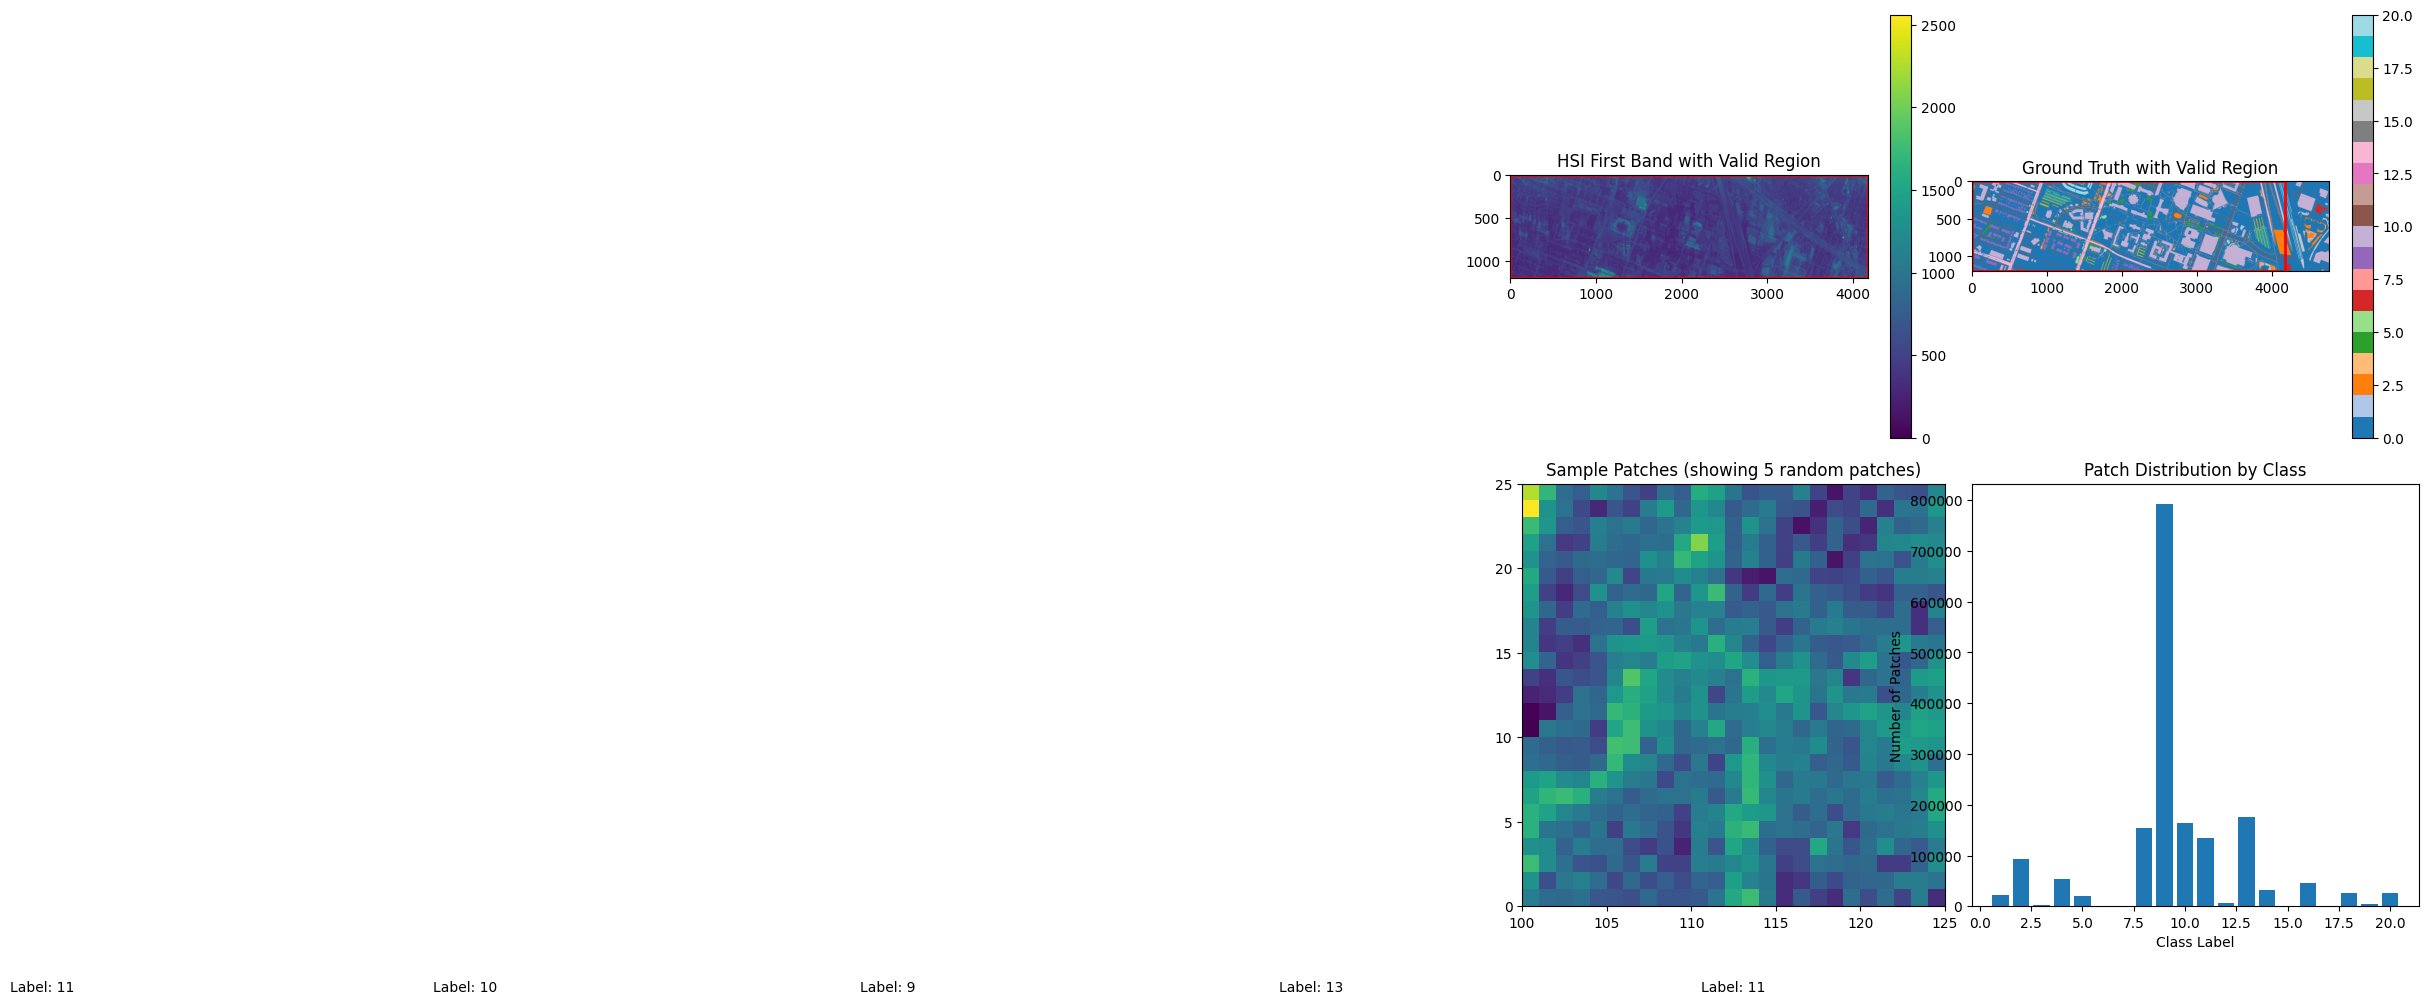


Patch Statistics:
Total patches extracted: 1759182
Patch shape: (25, 25, 48)

Class distribution:
Class 1: 23476 patches (1.33%)
Class 2: 92564 patches (5.26%)
Class 3: 1932 patches (0.11%)
Class 4: 54024 patches (3.07%)
Class 5: 20172 patches (1.15%)
Class 6: 908 patches (0.05%)
Class 7: 1064 patches (0.06%)
Class 8: 154743 patches (8.80%)
Class 9: 792750 patches (45.06%)
Class 10: 165042 patches (9.38%)
Class 11: 134069 patches (7.62%)
Class 12: 6059 patches (0.34%)
Class 13: 176922 patches (10.06%)
Class 14: 31967 patches (1.82%)
Class 16: 45683 patches (2.60%)
Class 17: 587 patches (0.03%)
Class 18: 26289 patches (1.49%)
Class 19: 4579 patches (0.26%)
Class 20: 26352 patches (1.50%)


In [5]:
# Cell 5: Run visualization
visualize_patch_extraction()